<a href="https://colab.research.google.com/github/phuri7987/229352-StatisticalLearning-Lab/blob/main/Lab07_Boosted_trees_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #7


## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`).

2. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

- AdaBoost. Grid search over `n_estimators` and `learning_rate`.
- XGBoost. Grid search over `n_estimators`, `max_depth` and `learning_rate`.
- LightGBM. Grid search over `n_estimators`, `max_depth` and `learning_rate`.

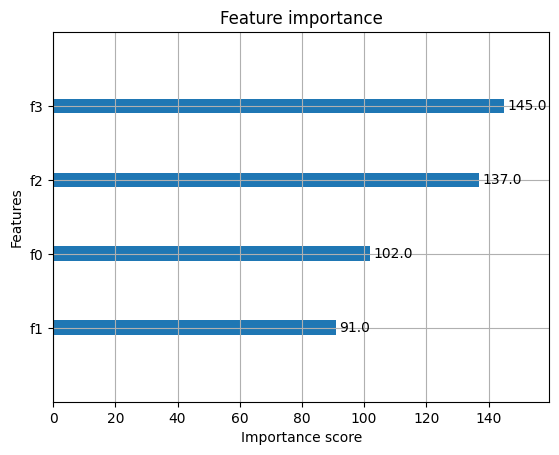

In [4]:
from xgboost import XGBClassifier, plot_importance

from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


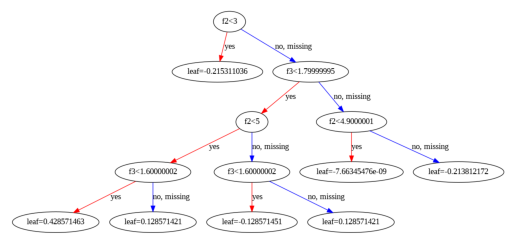

In [5]:
from xgboost import plot_tree

plot_tree(model, num_trees=1);

In [6]:
import pandas as pd

data = pd.read_csv('X_train.csv', header=None)


data



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,39.0,0.0,2.0,94.0,199.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,2.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0
2,50.0,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0
3,54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,50.0,1.0,2.0,140.0,233.0,0.0,1.0,163.0,0.0,0.6,1.0,1.0,3.0
208,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0
209,69.0,1.0,3.0,160.0,234.0,1.0,0.0,131.0,0.0,0.1,1.0,1.0,2.0
210,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0


In [7]:
import numpy as np

data = np.genfromtxt("X_train.csv", delimiter=",")

data

array([[39.,  0.,  2., ...,  2.,  0.,  2.],
       [29.,  1.,  1., ...,  2.,  0.,  2.],
       [50.,  0.,  2., ...,  1.,  0.,  2.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

In [13]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [9]:
X_train = pd.read_csv('/content/X_train.csv')
Y_train = pd.read_csv('/content/y_train.csv')
x_test = pd.read_csv('/content/X_test.csv')
Y_test = pd.read_csv('/content/y_test.csv')

In [10]:
print(X_train.shape)  # Output the shape of X_train
print(Y_train.shape)  # Output the shape of y_train

(211, 13)
(211, 1)


In [11]:
common_indices = X_train.index.intersection(Y_train.index)
# Subset X_train and Y_train using the common indices
X_train_aligned = X_train.loc[common_indices]
Y_train_aligned = Y_train.loc[common_indices]
print("X_train aligned shape:", X_train_aligned.shape)
print("Y_train aligned shape:", Y_train_aligned.shape)

X_train aligned shape: (211, 13)
Y_train aligned shape: (211, 1)


In [14]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_train_aligned, Y_train_aligned, test_size=0.25, random_state=42)

In [15]:
model_Ada = AdaBoostClassifier()
param_grid_model1 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]}

model_XGB = XGBClassifier()
param_grid_model2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]}

model_LG = LGBMClassifier()
param_grid_model3 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]}

In [16]:
models_Boot = {'AdaBoostClassifier': (model_Ada, param_grid_model1),
    'XGBClassifier': (model_XGB, param_grid_model2),
    'LGBMClassifier': (model_LG, param_grid_model3)}

In [18]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance as xgb_plot_importance
from lightgbm import LGBMClassifier, plot_importance as lgbm_plot_importance

In [19]:
for model_name, (model, param_grid) in models_Boot.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train.values.ravel())

    # Evaluate on test set
    best_model_Booting = grid_search.best_estimator_
    y_pred = best_model_Booting.predict(X_test_val)
    test_accuracy = accuracy_score(y_test_val, y_pred)
    print(f"Test accuracy for {model_name}: {test_accuracy:.4f}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

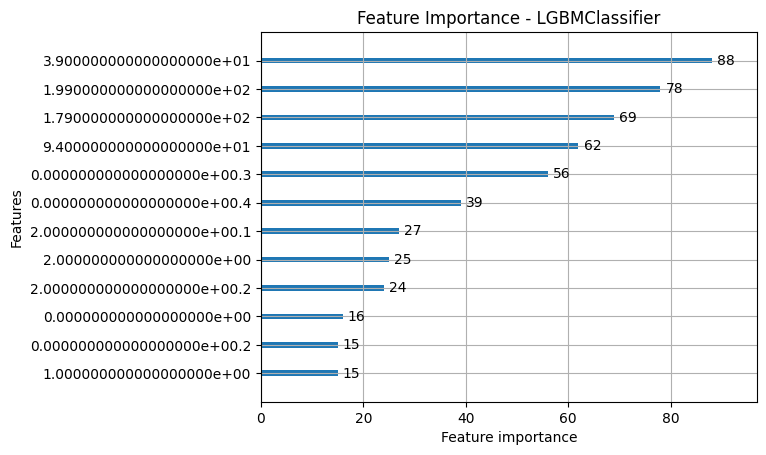

In [20]:
    if model_name == 'AdaBoostClassifier':
        feature_importances = best_model_Booting.feature_importances_
    elif model_name == 'XGBClassifier':
        feature_importances = best_model_Booting.feature_importances_
        xgb_plot_importance(best_model_Booting)
    elif model_name == 'LGBMClassifier':
        feature_importances = best_model_Booting.feature_importances_
        lgbm_plot_importance(best_model_Booting)
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

In [21]:
# Print the best hyperparameters
print(f"Best parameters Name {model_name}: {grid_search.best_params_}\n")

Best parameters Name LGBMClassifier: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}

